# This is my NBA 2023 Playground
### Games & Player Stats

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import the Dataset with delimiter ;
# Didn't work at the beginning as decoding was necessary --> ChatGPT was my friend

df = pd.read_csv('/Users/robertkurtz/Desktop/NBA 2023 Dataplayground/data/2022-2023 NBA Player Stats - Regular.csv', delimiter=';', encoding='ISO-8859-1')

### Descriptive part

In [7]:
# 553 rows & 30 columns
df.shape


(553, 30)

In [9]:
# Show head and first rows...
print(df.head(7))


   Rk                    Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0   1          Precious Achiuwa   C   23  TOR  33   9  23.0  4.0   8.2  ...   
1   2              Steven Adams   C   29  MEM  42  42  27.0  3.7   6.3  ...   
2   3               Bam Adebayo   C   25  MIA  52  52  35.3  8.6  15.7  ...   
3   4              Ochai Agbaji  SG   22  UTA  35   1  14.0  1.5   3.2  ...   
4   5              Santi Aldama  PF   22  MEM  52  18  22.0  3.4   7.0  ...   
5   6  Nickeil Alexander-Walker  SG   24  TOT  37   3  14.3  2.2   4.6  ...   
6   6  Nickeil Alexander-Walker  SG   24  UTA  36   3  14.7  2.3   4.7  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.697  2.1  4.3   6.4  1.1  0.7  0.7  1.2  2.2  10.4  
1  0.364  5.1  6.5  11.5  2.3  0.9  1.1  1.9  2.3   8.6  
2  0.806  2.7  7.3  10.1  3.3  1.2  0.8  2.6  2.8  21.6  
3  0.625  0.6  1.0   1.6  0.5  0.1  0.1  0.3  1.4   4.1  
4  0.730  1.0  3.7   4.7  1.2  0.7  0.7  0.7  1.9   9.5  
5  0.692  0.2  1.4 

### Cleaning the data

In [47]:
# It seems that e.g. Alexander Walker is multiple times in the set, which is not exactly what I want to have non biased averages.
# Therefore, I remove the duplicates by:

# drop duplicate rows based on a subset of columns
df = df.drop_duplicates(subset=['Player'])

# I want that all columns are in one column so I change the view like this

pd.set_option('display.max_columns', 20)

print(df.head(10)) #Indeed the players are unique now

df.shape # reduced from 553 to 505 rows (about 48 players were duplicates and removed...)

    Rk                    Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1          Precious Achiuwa   C   23  TOR  33   9  23.0  4.0   8.2  ...   
1    2              Steven Adams   C   29  MEM  42  42  27.0  3.7   6.3  ...   
2    3               Bam Adebayo   C   25  MIA  52  52  35.3  8.6  15.7  ...   
3    4              Ochai Agbaji  SG   22  UTA  35   1  14.0  1.5   3.2  ...   
4    5              Santi Aldama  PF   22  MEM  52  18  22.0  3.4   7.0  ...   
5    6  Nickeil Alexander-Walker  SG   24  TOT  37   3  14.3  2.2   4.6  ...   
8    7             Grayson Allen  SG   27  MIL  52  50  27.5  3.4   7.6  ...   
9    8             Jarrett Allen   C   24  CLE  52  52  33.1  6.2   9.4  ...   
10   9             Jose Alvarado  PG   24  NOP  56   9  21.6  3.3   8.1  ...   
11  10             Kyle Anderson  PF   29  MIN  46  31  26.0  3.0   6.0  ...   

      FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0   0.697  2.1  4.3   6.4  1.1  0.7  0.7  1.2  2.2  10.4  
1

(505, 30)

In [48]:
# With this command I get all the column names. 
# It seems that there is no option to get the full name additional to the abbreviations

print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [49]:
# Now I want to get rid of the unimportant columns/stats
# As I don't want to create a new df for it I use this command:

df = df.drop(['FG', '3P', '2P', '2PA', 'FT'], axis=1)

# To check 
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FGA', 'FG%',
       '3PA', '3P%', '2P%', 'eFG%', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


### "I wanna compare Steph to Lebron..." --> Well that was foreseeable^^

In [3]:
# filter the rows containing "Steph Curry" or "LeBron" in the player name column
steph_lebron = df[df['Player'].str.contains('Steph|LeBron')]

# display the filtered DataFrame
print(steph_lebron)

SyntaxError: invalid syntax (764981284.py, line 5)

## Creating a hybrid Monster  --> "LeCurry"

**First Approach: "The plain average"**

In [62]:
# select the columns we want to combine
columns_to_combine = ['Age', 'G', 'GS', 'MP', 'FGA','FG%','3PA','3P%', '2P%', 'eFG%', 'FTA' ,'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [63]:
# filter the dataframe to get only Steph Curry and LeBron James rows
filtered_df = df[df['Player'].isin(['Stephen Curry', 'LeBron James'])]

In [64]:
# calculate the average values for the selected columns
averages = filtered_df[columns_to_combine].mean()

In [65]:

# create a new dataframe with the average values
le_curry = pd.DataFrame(data=[averages], columns=columns_to_combine)

In [66]:
# It worked!!! Here are the combined values
print(le_curry)

    Age     G    GS    MP   FGA     FG%  3PA    3P%     2P%    eFG%  ...  \
0  36.0  41.0  41.0  35.5  21.3  0.5015  9.2  0.371  0.5905  0.5875  ...   

     FT%  ORB   DRB  TRB  AST  STL   BLK   TOV   PF   PTS  
0  0.843  0.9  6.55  7.4  6.7  1.0  0.45  3.15  1.9  29.8  

[1 rows x 21 columns]


### This can't be it... 

**Second Approach: "Subjective Fan Evaluation"**

However, this is now the feared **Monster**? Simply combining their values...?! 
Well this is one way to display it but in reality the stats should be increasing ^^ as their combined game is yielding a better overall performance/result.

Thus, here is another approach of simply multiplying the combined value with a subjective factor:

In [67]:
#we remember the combined df with their mean values
print(le_curry)

    Age     G    GS    MP   FGA     FG%  3PA    3P%     2P%    eFG%  ...  \
0  36.0  41.0  41.0  35.5  21.3  0.5015  9.2  0.371  0.5905  0.5875  ...   

     FT%  ORB   DRB  TRB  AST  STL   BLK   TOV   PF   PTS  
0  0.843  0.9  6.55  7.4  6.7  1.0  0.45  3.15  1.9  29.8  

[1 rows x 21 columns]


In [68]:
#Let's use Pandas Multiply to easily take into account the highly subjective and easily manipulatable factor of "LeCurry would be better by * x "

le_curry_25 = le_curry.mul(1.25)

print(le_curry_25)


    Age      G     GS      MP     FGA       FG%   3PA      3P%       2P%  \
0  45.0  51.25  51.25  44.375  26.625  0.626875  11.5  0.46375  0.738125   

       eFG%  ...      FT%    ORB     DRB   TRB    AST   STL     BLK     TOV  \
0  0.734375  ...  1.05375  1.125  8.1875  9.25  8.375  1.25  0.5625  3.9375   

      PF    PTS  
0  2.375  37.25  

[1 rows x 21 columns]


In [58]:
# the result he is quite good but also quite old... --> Not a realistic approach ;)

### *DJ Khaled Voice* "Another One!

**Third Approach: "Giving Lebron Steph's shooting abilities"**

What if there is yet another approach of how we can create the LeCurry monster? Maybe the most realistic one yet.

- The approach would be to simply use Steph's shooting % and multiply them with Lebron's total attemps
- The result would be Lebron having even more points but keeping his rebounds & assists

... Now it's truly scary!

Let's replace le_curry's 3P%, FG% & FT% by Steph's Shooting Percentages


In [69]:
# create DataFrame for Stephen Curry's shooting percentages
steph_curry = pd.DataFrame({
    '3P%': [0.429],
    'FG%': [0.493],
    'FT%': [0.916] })

# replace shooting percentages in le_curry with those in steph_curry
le_curry.update(steph_curry)

print(le_curry)
# the code was generated by ChatGPT

    Age     G    GS    MP   FGA    FG%  3PA    3P%     2P%    eFG%  ...  \
0  36.0  41.0  41.0  35.5  21.3  0.493  9.2  0.429  0.5905  0.5875  ...   

     FT%  ORB   DRB  TRB  AST  STL   BLK   TOV   PF   PTS  
0  0.916  0.9  6.55  7.4  6.7  1.0  0.45  3.15  1.9  29.8  

[1 rows x 21 columns]


Shooting % look nice on paper, but to see the actual impact of Steph's Shooting with Lebron's Body we must multiply them with le_curry's attemps.

**This should lead to a new total point average...**



In [71]:
# multiply shooting percentages with their respective FGA, FTA, and 3PA
le_curry['3P'] = (le_curry['3PA'] * le_curry['3P%']) * 3 #sucessfull 3PA yield 3 points...
le_curry['FG'] = (le_curry['FGA'] * le_curry['FG%']) * 2 #sucessfull FGA yield 2 points...
le_curry['FT'] = le_curry['FTA'] * le_curry['FT%']

# print the modified DataFrame
print(le_curry)

    Age     G    GS    MP   FGA    FG%  3PA    3P%     2P%    eFG%  ...  TRB  \
0  36.0  41.0  41.0  35.5  21.3  0.493  9.2  0.429  0.5905  0.5875  ...  7.4   

   AST  STL   BLK   TOV   PF   PTS       3P       FG      FT  
0  6.7  1.0  0.45  3.15  1.9  29.8  11.8404  21.0018  5.3586  

[1 rows x 24 columns]


Now the new total point average is simply the sum of all three:

In [72]:
# summing up the scoring points
le_curry['PTS'] = le_curry['3P'] + le_curry['FG'] + le_curry['FT']

#le_curry is born
print(le_curry)

    Age     G    GS    MP   FGA    FG%  3PA    3P%     2P%    eFG%  ...  TRB  \
0  36.0  41.0  41.0  35.5  21.3  0.493  9.2  0.429  0.5905  0.5875  ...  7.4   

   AST  STL   BLK   TOV   PF      PTS       3P       FG      FT  
0  6.7  1.0  0.45  3.15  1.9  38.2008  11.8404  21.0018  5.3586  

[1 rows x 24 columns]


LeCurry would average 38.2 Points per Game with the 2022-2023 Stats...!

# Now some visuals...

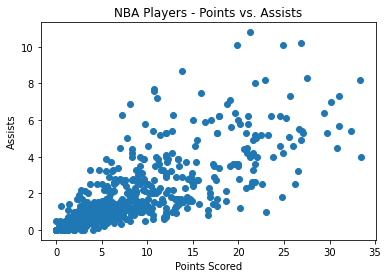

In [48]:
# Create a scatter plot of points scored and assists for all players

plt.scatter(df['PTS'], df['AST'])
plt.title('NBA Players - Points vs. Assists')
plt.xlabel('Points Scored')
plt.ylabel('Assists')
plt.show()

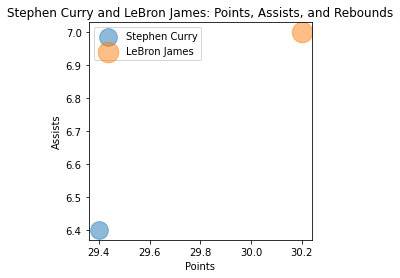

In [61]:
# Create a scatter plot of points scored and assists for Lebron, Steph & LeCurry

# create a dataframe with only Stephen Curry and Lebron James
df_sl = df[df['Player'].isin(['Stephen Curry', 'LeBron James'])]

# create a scatter plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(df_sl[df_sl['Player']=='Stephen Curry']['PTS'],
           df_sl[df_sl['Player']=='Stephen Curry']['AST'],
           s=df_sl[df_sl['Player']=='Stephen Curry']['TRB']*50,
           alpha=0.5,
           label='Stephen Curry')
ax.scatter(df_sl[df_sl['Player']=='LeBron James']['PTS'],
           df_sl[df_sl['Player']=='LeBron James']['AST'],
           s=df_sl[df_sl['Player']=='LeBron James']['TRB']*50,
           alpha=0.5,
           label='LeBron James')

# add axis labels and title
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_title('Stephen Curry and LeBron James: Points, Assists, and Rebounds')

# add legend
# the bigger the circle marker the more rebounds they have
ax.legend()

plt.show()